## 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# NLP libraries to clean the text data
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

# Vectorization technique TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# For Splitting the dataset
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
# Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report , roc_curve

#Accuracy measuring library
from sklearn.metrics import accuracy_score


## 2. Loading the data

In [4]:
file_path = 'C:/Users/CITY_LAP/Desktop/fake_news/train.csv'
data = pd.read_csv(file_path)

In [3]:
data.shape #Returns the number of rows and columns present in the dataset

(20800, 5)

In [5]:
data.head()  # Returns the first 5 rows of the dataset

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
data.columns # Returns the column headings

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [7]:
data.isnull().sum() #To check the null values in the dataset, if any

id           0
title      558
author    1957
text        39
label        0
dtype: int64

## 3.Data-Preprocessing

For further analysis, cleaning of data is necessary. 
In this Notebook, I will be doing 3 stages of data cleaning:
1. Removing the Null values
2. Adding a new field
3. Drop features that are not needed
4. Text Processing

In [8]:
df = data.copy() #Creating a copy of my data, I will be working on this Dataframe

## 3.1. Removing the Null Values

As Body field has some empty fields, it can be handled in two ways:
1. Drop the 21 rows
2. Replace the null value with a dummy string

Here, I will be going with the 2nd option, because although dropping 21 rows would not affect the accuracy, as it is just a minute portion of our large dataset, it is never recommended.

I will be replacing the Null(Nan) values in 'Body' field with an empty string ('')

In [9]:
df = df.fillna('')   # As Body is empty, just filled with an empty space

In [10]:
df.isnull().sum()  # No null values found

id        0
title     0
author    0
text      0
label     0
dtype: int64

## 3.2. Adding a new column
For ease of implementation, I combined Headline and Body Column and created a new column 'News' 

In [11]:
df['News'] = df['author']+df['title']

In [12]:
df.head()

,id,title,author,text,label,News
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell LucusHouse Dem Aide: We Didn’t Even Se...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.comWhy the Truth Might Get You ...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss15 Civilians Killed In Single U...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard PortnoyIranian woman jailed for fiction...


In [13]:
df.columns

Index(['id', 'title', 'author', 'text', 'label', 'News'], dtype='object')

## 3.3. Drop features that are not needed

In [14]:
features_dropped = ['id', 'title', 'author', 'text']
df = df.drop(features_dropped, axis =1)

In [15]:
df.columns

Index(['label', 'News'], dtype='object')

## 3.4. Text Processing
1. Remove symbols(',','-',...etc)
2. Remove stop words
3. Stemming

In [16]:
ps = PorterStemmer()
def wordopt(text):
    text = re.sub('[^a-zA-Z]', ' ',text)
    text = text.lower()
    text = text.split()
    text = [ps.stem(word) for word in text if not word in stopwords.words('english')]
    text = ' '.join(text)
    return text

In [17]:
df['News'] = df['News'].apply(wordopt) #Applying the text processing techniques onto every row data

In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CITY_LAP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Splitting DataSet

In [19]:
X = df['News']
Y = df['label']

#Split the data into training and test set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

## 5. Vectorization

This is used to handle our text data, by converting it into vectors.

In [20]:
#Vectorization
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

## 6. Model Fitting
I will be fitting my data onto 3 classifications models
1. Logistic Regression
2. SVM
3. RandomForestClassifier

The best one amongst the 3 will be used further

In [21]:
#1. Logistic Regression - used because this model is best suited for binary classification
LR_model = LogisticRegression()

#Fitting training set to the model
LR_model.fit(xv_train,y_train)

#Predicting the test set results based on the model
lr_y_pred = LR_model.predict(xv_test)

#Calculate the accurracy of this model
score = accuracy_score(y_test,lr_y_pred)
print('Accuracy of LR model is ', score)

Accuracy of LR model is  0.9496153846153846


In [22]:
def conf_matrix(model):
    ConfusionMatrixDisplay.from_estimator(
        model,
        xv_test,
        y_test
    )
def class_report(model):
    print(classification_report(
        y_test,
        model.predict(xv_test)
    ))

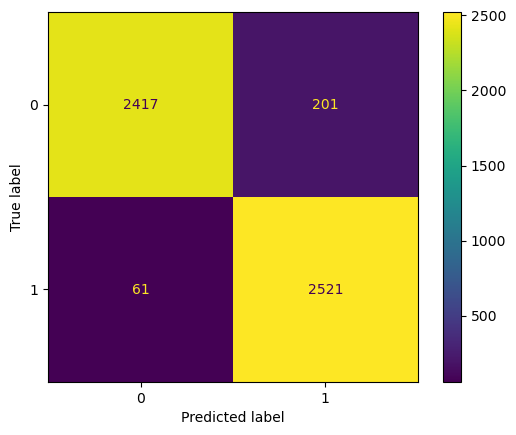

In [23]:
conf_matrix(LR_model)

In [24]:
class_report(LR_model)

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      2618
           1       0.93      0.98      0.95      2582

    accuracy                           0.95      5200
   macro avg       0.95      0.95      0.95      5200
weighted avg       0.95      0.95      0.95      5200



In [25]:
#2. Support Vector Machine(SVM) - SVM works relatively well when there is a clear margin of separation between classes.
svm_model = SVC(kernel='linear')

#Fitting training set to the model
svm_model.fit(xv_train,y_train)

#Predicting the test set results based on the model
svm_y_pred = svm_model.predict(xv_test)

#Calculate the accuracy score of this model
score = accuracy_score(y_test,svm_y_pred)
print('Accuracy of SVM model is ', score)

Accuracy of SVM model is  0.9730769230769231


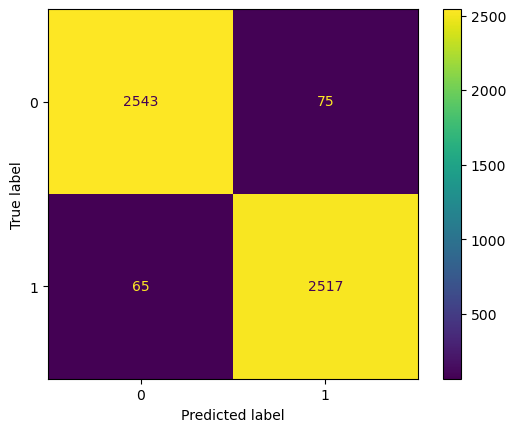

In [26]:
conf_matrix(svm_model)

In [27]:
class_report(svm_model)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2618
           1       0.97      0.97      0.97      2582

    accuracy                           0.97      5200
   macro avg       0.97      0.97      0.97      5200
weighted avg       0.97      0.97      0.97      5200



In [28]:
#3. Random Forest Classifier 
RFC_model = RandomForestClassifier(random_state=0)

#Fitting training set to the model
RFC_model.fit(xv_train, y_train)

#Predicting the test set results based on the model
rfc_y_pred = RFC_model.predict(xv_test)

#Calculate the accuracy score of this model
score = accuracy_score(y_test,rfc_y_pred)

print('Accuracy of RFC model is ', score)

Accuracy of RFC model is  0.9730769230769231


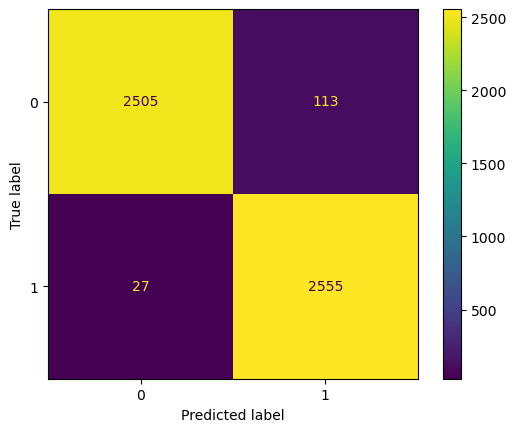

In [29]:
conf_matrix(RFC_model)

In [30]:
class_report(RFC_model)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2618
           1       0.96      0.99      0.97      2582

    accuracy                           0.97      5200
   macro avg       0.97      0.97      0.97      5200
weighted avg       0.97      0.97      0.97      5200



In [31]:
from sklearn.naive_bayes import MultinomialNB
NB_model = MultinomialNB()

#Fitting training set to the model
NB_model.fit(xv_train, y_train)

#Predicting the test set results based on the model
nb_y_pred = NB_model.predict(xv_test)

#Calculate the accuracy score of this model
score = accuracy_score(y_test,nb_y_pred)

print('Accuracy of Naive bayes model is ', score)

Accuracy of Naive bayes model is  0.9190384615384616


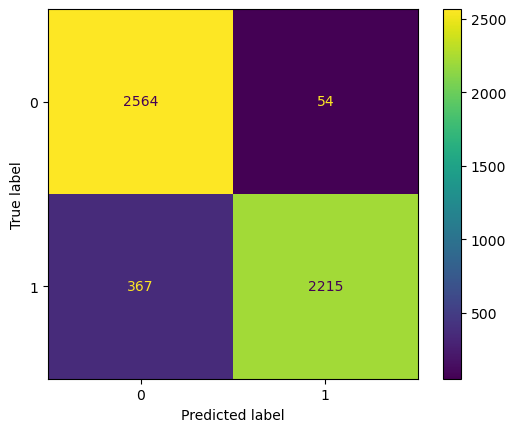

In [32]:
conf_matrix(NB_model)

In [33]:
class_report(NB_model)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2618
           1       0.98      0.86      0.91      2582

    accuracy                           0.92      5200
   macro avg       0.93      0.92      0.92      5200
weighted avg       0.93      0.92      0.92      5200



## 7. Manual Model Testing

In [34]:
# As SVM is able to provide best results - SVM will be used to check the news liability

def fake_news_det(news):
    input_data = {"text":[news]}
    new_def_test = pd.DataFrame(input_data)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    #print(new_x_test)
    vectorized_input_data = vectorization.transform(new_x_test)
    prediction = svm_model.predict(vectorized_input_data)
    
    if prediction == 1:
        print("Real News")
    else:
        print("Fake News")

In [35]:
fake_news_det('U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sundayâ€™s unity march against terrorism.')

Fake News


In [36]:

fake_news_det("""The second Covid-19 wave in India is now on the "downswing," the Centre said on Thursday, highlighting that the current number of active cases is still "very high" and advised states and Union territories (UTs) to not let down their guards.""")

Real News


In [40]:
import pickle

In [41]:
pickle.dump(svm_model, open('model.pkl', 'wb'))

In [42]:
pickle.dump(vectorization, open('tfidfvect.pkl', 'wb'))

In [43]:
joblib_model = pickle.load(open('model.pkl', 'rb'))

In [44]:
joblib_vect = pickle.load(open('tfidfvect.pkl', 'rb'))